<a href="https://colab.research.google.com/github/NadiaHartini/latihan1/blob/main/Tugas_Komputasi_Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anggota Kelompok:

1.   Marcella Sintauly (2006568916)
2.   Lutfia Maulidina (2006483151)
3.   Miranda Rosely (2006528710)
4.   Salma Mazaya Fasya (2006536126)
5.   Nadia Hartini Kusumawijaya (2006483542)



# Import modul

In [ ]:
# Memuat package yang di perlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
pd.set_option("display.max_colwidth", 200) # untuk memuat display sebanyak 200 object pada column

# Import dataset


In [ ]:
# Memuat datadari modul sklearn (modul sudah memiliki data, jadi tinggal di panggil)
from sklearn.datasets import fetch_20newsgroups 

# menghilangkan header teks, menghilangkan footer atau blok pada akhir teks seperti tanda tangan, menghilangkan garis yang biasanya merujuk ke sumber lain
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes')) 
documents = dataset.data 

In [ ]:
# Melihat data set yang sudah di ambil
documents[:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
# Memeriksa banyak dokumen
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
news_df = pd.DataFrame({'document':documents})
news_df.head()

,document
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n..."
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti..."
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca..."
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ..."


# Data pre-processing

In [ ]:
# Masukkan menjadi dataframe agar mempermudah preprocessing
news_df = pd.DataFrame({'document':documents})

# Menghapus semua karakter selain huruf alfabet (seperti tanda baca, angka dan karakter khusus) 
# Akan di ganti dengaan spasi " " (jadi hilang)
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# Menghilangkan kata-kata yang pendek (< tiga kata) karena biasanya tidak mengandung informasi yang penting
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Mengubah semua huruf menjadi huruf kecil untuk menghilangkan bias pada huruf besar
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
news_df.head() #Perbandingan dokumen yang belum di preprocessing dan sesudah

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure about story seem biased what disagree with your statement that media ruin israels reputation that rediculous media most israeli media world having lived europe realize that incidences su...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that wil...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",although realize that principle your strongest points would still like know question this sort about arab countries want continue this think tank charade yours your fixation israel must stop might...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss about this proposal much change last product this area priced over suspect clipper phones will came customer with automatically preregistered with government author...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",well will have change scoring playoff pool unfortunately have time right will certainly post scoring rules tomorrow does matter enter anyway good keith keller rangers quakers kkeller mail upenn le...


In [ ]:
# Mengimport kata-kata yang tidak penting dengan modul stop words menggunakan spaCy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# Menjadikan data list yang memiliki entri masing-masing kata dari kalimat
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

tokenized_doc.head()

0    [well, sure, about, story, seem, biased, what, disagree, with, your, statement, that, media, ruin, israels, reputation, that, rediculous, media, most, israeli, media, world, having, lived, europe,...
1    [yeah, expect, people, read, actually, accept, hard, atheism, need, little, leap, faith, jimmy, your, logic, runs, steam, sorry, pity, sorry, that, have, these, feelings, denial, about, faith, nee...
2    [although, realize, that, principle, your, strongest, points, would, still, like, know, question, this, sort, about, arab, countries, want, continue, this, think, tank, charade, yours, your, fixat...
3    [notwithstanding, legitimate, fuss, about, this, proposal, much, change, last, product, this, area, priced, over, suspect, clipper, phones, will, came, customer, with, automatically, preregistered...
4    [well, will, have, change, scoring, playoff, pool, unfortunately, have, time, right, will, certainly, post, scoring, rules, tomorrow, does, matter, enter, anyway, good, keith,

In [ ]:
# menghapus kata-kata stop words dari modul spaCY yang sudah di impor sebelumnya
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

tokenized_doc.head()

0    [sure, story, biased, disagree, statement, media, ruin, israels, reputation, rediculous, media, israeli, media, world, having, lived, europe, realize, incidences, described, letter, occured, media...
1    [yeah, expect, people, read, actually, accept, hard, atheism, need, little, leap, faith, jimmy, logic, runs, steam, sorry, pity, sorry, feelings, denial, faith, need, pretend, happily, maybe, star...
2    [realize, principle, strongest, points, like, know, question, sort, arab, countries, want, continue, think, tank, charade, fixation, israel, stop, start, asking, sort, questions, arab, countries, ...
3    [notwithstanding, legitimate, fuss, proposal, change, product, area, priced, suspect, clipper, phones, came, customer, automatically, preregistered, government, authorities, aside, attempting, leg...
4        [change, scoring, playoff, pool, unfortunately, time, right, certainly, post, scoring, rules, tomorrow, matter, enter, good, keith, keller, rangers, quakers, kkeller, mail

In [ ]:
# Menggabungkan kembali kata-kata yang telah dipisah
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

news_df.head()

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,sure story biased disagree statement media ruin israels reputation rediculous media israeli media world having lived europe realize incidences described letter occured media ignore subsidizing isr...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need pretend happily maybe start newsgroup atheist hard bu...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",realize principle strongest points like know question sort arab countries want continue think tank charade fixation israel stop start asking sort questions arab countries realize work arab countri...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss proposal change product area priced suspect clipper phones came customer automatically preregistered government authorities aside attempting legitimize solidify pos...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",change scoring playoff pool unfortunately time right certainly post scoring rules tomorrow matter enter good keith keller rangers quakers kkeller mail upenn league champs


In [ ]:
# Mengubah data teks menjadi vektor yang berisi TF-IDF tiap kata
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
                             max_features= 1000, #Membatasi jumlah kata perdokumen menjadi 1000 
                             max_df = 0.8, #Menghilangkan kata yang terlalu sering muncul (intsitas muncul sebesar 80%)
                             smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape
print(X)

  (0, 667)	0.1229087467386965
  (0, 448)	0.15676128373977422
  (0, 500)	0.11427922504246953
  (0, 73)	0.12842145223127568
  (0, 518)	0.13023235011628645
  (0, 370)	0.1250882619438884
  (0, 718)	0.15707542633006963
  (0, 817)	0.18178635360526754
  (0, 734)	0.16129596398099272
  (0, 154)	0.15583745783363678
  (0, 732)	0.15902998683287675
  (0, 714)	0.12653233992058463
  (0, 896)	0.08668891812288351
  (0, 480)	0.1657602908509574
  (0, 231)	0.16837160174637328
  (0, 713)	0.16354512585321504
  (0, 294)	0.17463766382454948
  (0, 392)	0.12202679024777312
  (0, 985)	0.1199015893172556
  (0, 442)	0.3395287303208839
  (0, 534)	0.6518696120442382
  (0, 844)	0.1505488824632646
  (0, 852)	0.1549402845030415
  (0, 870)	0.11000206865963957
  (1, 340)	0.21610968006327091
  :	:
  (11313, 651)	0.11613445815200235
  (11313, 163)	0.12316713864588107
  (11313, 186)	0.1599278458973547
  (11313, 913)	0.170627837719155
  (11313, 98)	0.14547020007633218
  (11313, 944)	0.14276716999666583
  (11313, 519)	0.14538

# Modelling

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Membuat kata dan dokumen dalam bentuk vektor dengan dimensi 20
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

print(len(svd_model.components_))
print(svd_model.components_)

20
[[ 0.014855    0.0506746   0.02156661 ...  0.0796474   0.01464699
   0.01807398]
 [-0.00543409  0.01664027 -0.01601753 ... -0.06383733 -0.01044135
  -0.01856597]
 [ 0.0020626  -0.00328323 -0.01854968 ...  0.05986341  0.02545132
   0.02176531]
 ...
 [-0.00996025  0.00423114  0.00203588 ... -0.00668282 -0.00287467
  -0.00050346]
 [ 0.00635043  0.02569153  0.01243438 ... -0.0885732  -0.0008235
  -0.0053731 ]
 [-0.00293202  0.04038339  0.00632426 ... -0.0100434   0.00361621
   0.00463971]]


In [ ]:
# Kumpulan kata-kata akan tersusun menjadi topik
terms = vectorizer.get_feature_names()

# Print kumpulan topik
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ", end='')
    for t in sorted_terms:
      print(t[0], end=' ')
    print(" ")

Topic 1: like know people think good time thanks right want need  
Topic 2: thanks windows card drive mail file advance files software program  
Topic 3: game team year games season players good play hockey drive  
Topic 4: drive scsi hard disk card drives problem controller floppy apple  
Topic 5: windows file window files program problem version running screen team  
Topic 6: government space chip mail information data encryption sale phone clipper  
Topic 7: like bike chip sounds know looks look clipper encryption sure  
Topic 8: card sale video monitor offer price jesus condition good shipping  
Topic 9: know card chip video government people clipper encryption drivers cards  
Topic 10: good know time bike problem jesus work want long bible  
Topic 11: think good chip clipper need encryption people mail thanks address  
Topic 12: thanks problem right bike good window time advance people israel  
Topic 13: good people windows know sale file files price condition bike  
Topic 14: spa

In [ ]:
from sklearn.manifold import TSNE
X_topics=svd_model.transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)

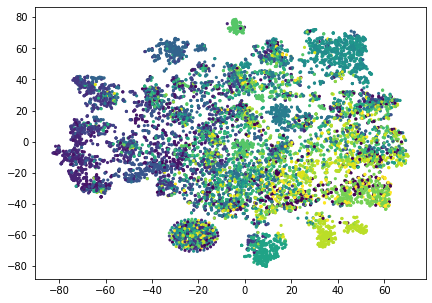

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

# Plot Grafik


In [ ]:
d1 = "like know people think good time thanks right want need"  
d2 =  "thanks windows card drive mail file advance files software program"  
d3 ="game team year games season players good play hockey drive"  
d4 = "drive scsi hard disk card drives problem controller floppy apple"  
d5 = "windows file window files program problem version running screen team"  
d6 = "government space chip mail information data encryption sale phone clipper"  
d7 = "like bike chip sounds know looks look clipper encryption sure"
d8 = "card sale video monitor offer price jesus condition good shipping"  
d9 = "know card chip video government people clipper encryption drivers cards"  
d10 = "good know time bike problem jesus work want long bible"
d11 = "think good chip clipper need encryption people mail thanks address"  
d12 = "thanks problem right bike good window time advance people israel"
d13 = "good people windows know sale file files price condition bike"
d14 = "space think know nasa problem year israel sale article years"
d15 = "space good card thanks people year nasa like video time"
d16 = "people problem game window time work want need bike space"  
d17 = "problem good window israel people know israeli team server motif"  
d18 = "file time problem need files mail game address said post"
d19 = "need right file card files want good help looking game"
d20 = "need time windows want israel window israeli team long help"  

# Data merupakan kumpulan dokumen sehingga ditulis sebagai berikut:
D = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
A = vsm.fit_transform(D)

A.shape

(20, 77)

In [ ]:
type(A)

scipy.sparse.csr.csr_matrix

In [ ]:
A.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(str(vsm.vocabulary_)[:93])

{'like': 33, 'know': 32, 'people': 44, 'think': 67, 'good': 23, 'time': 68, 'thanks': 66, 'ri


In [ ]:
# Solve menggunakan Numpy
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (20, 20) (20,) (77, 77)
[6.74950669 4.48909151 4.04891623 3.6853952  3.55284206 3.31773253
 3.14764738 3.06718862 3.03452618 2.83637571 2.61676141 2.56103231
 2.40708939 2.20987982 2.12777374 2.01793983 1.94105997 1.74933284
 1.58383267 1.44835492]


In [ ]:
# Lakukan plot hasil di atas

x_kata = V[0,:] # Baris pertama matrix V = sumbu x kata
y_kata = V[1,:] # Baris kedua matrix V = sumbu y kata

# Label dari setiap barisnya adalah kata-kata
# Akan digunakan perintah yang sama dengan perintah pada segmen sebelumnya
print(vsm.vocabulary_)


{'like': 33, 'know': 32, 'people': 44, 'think': 67, 'good': 23, 'time': 68, 'thanks': 66, 'right': 52, 'want': 71, 'need': 42, 'windows': 73, 'card': 6, 'drive': 14, 'mail': 38, 'file': 18, 'advance': 1, 'files': 19, 'software': 61, 'program': 51, 'game': 21, 'team': 65, 'year': 75, 'games': 22, 'season': 58, 'players': 47, 'play': 46, 'hockey': 27, 'scsi': 57, 'hard': 25, 'disk': 13, 'drives': 16, 'problem': 50, 'controller': 11, 'floppy': 20, 'apple': 2, 'window': 72, 'version': 69, 'running': 53, 'screen': 56, 'government': 24, 'space': 63, 'chip': 8, 'information': 28, 'data': 12, 'encryption': 17, 'sale': 55, 'phone': 45, 'clipper': 9, 'bike': 5, 'sounds': 62, 'looks': 37, 'look': 35, 'sure': 64, 'video': 70, 'monitor': 39, 'offer': 43, 'price': 49, 'jesus': 31, 'condition': 10, 'shipping': 60, 'drivers': 15, 'cards': 7, 'work': 74, 'long': 34, 'bible': 4, 'address': 0, 'israel': 29, 'nasa': 41, 'article': 3, 'years': 76, 'israeli': 30, 'server': 59, 'motif': 40, 'said': 54, 'post

In [ ]:
idx_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [idx_kata[i] for i in range(A.shape[0])]
print(Label)

['address', 'advance', 'apple', 'article', 'bible', 'bike', 'card', 'cards', 'chip', 'clipper', 'condition', 'controller', 'data', 'disk', 'drive', 'drivers', 'drives', 'encryption', 'file', 'files']


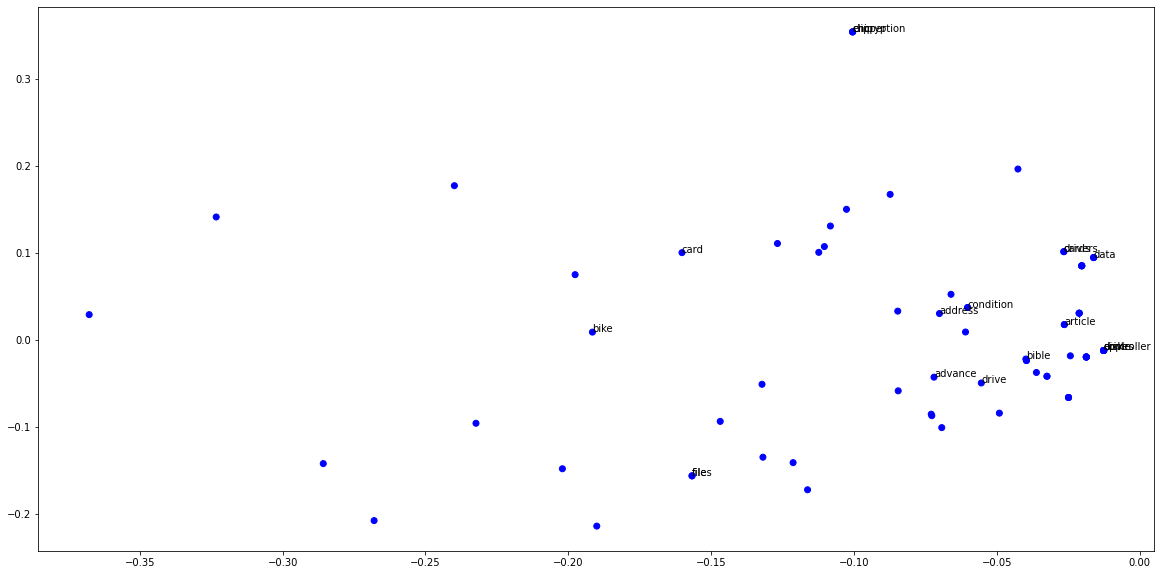

In [ ]:
# Plot sudah siap dibuat
plt.rcParams["figure.figsize"] = (20,10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))

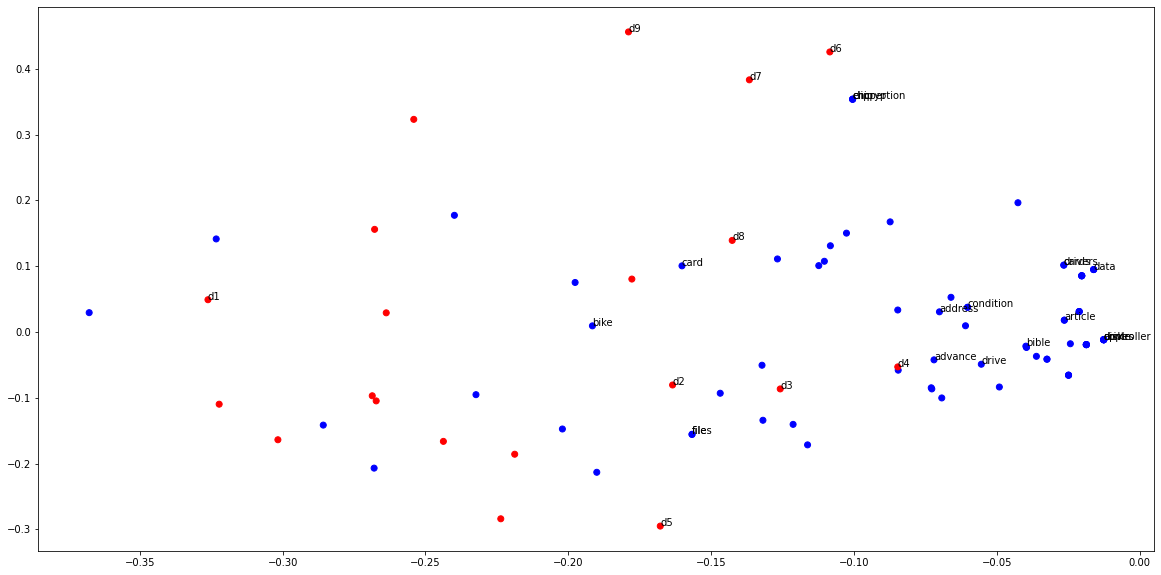

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
# Penggabungan plot Kata dan Dokumen
x_judul = U[:,0] # Kolom pertama matrix U = sumbu x judul
y_judul = U[:,1] # Kolom kedua matrix U = sumbu y judul

Label_judul = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']

# Lakukan plot dimulai dari "kata" menggunakan warna biru "b"
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))
    
# Kemudian plot "judul" (dokumen) menggunakan warna merah "r"
ax.scatter(x_judul, y_judul, c=['r']*len(x_judul))
for i, L in enumerate(Label_judul):
    ax.annotate(L, (x_judul[i],y_judul[i]))



#Kesimpulan

Metode SVD dapat digunakan untuk topic modelling untuk mencari 20 topik teratas dari sebuah dokumen. Dari hasil dekomposisi matriks dan visualisasi yang telah dilakukan, di dapatkan kata-kata yang paling sering muncul, antara lain : 'card', 'chip', 'files', 'data', 'government', 'encryption', 'advance',controller', 'drive', 'article'. Dari keyword tersebut dapat di simpulkan bahwa topik trend dari semua dokumen yang ada, berkaitan dengan keamanan teknologi digital dan peningkatan keamanannya.